#**Homework 2-FRA503 Machine Learning**
สมาชิก

นายธรรมสรณ์ โรจนอัครพงศ์ 64340500030

นายวศิน ยืนยงวศิน 64340500048

นายอลังการ เพชรจิตต์ 64340500055

ขั้นตอนแรก ทำการ Import library และ นำเข้าข้อมูล ซึ่งในที่นี้สนใจข้อมูลของการเลือกตั้งของประเทศไทยในปี 2566 ซึ่งมีข้อมูลที่น่าสนใจใน Sheet ที่ชื่อว่า result_constituencies_status จึงได้ทำการปริ้นออกมาและอ่านค่าได้ดังนี้

In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [ ]:
#import dataset
# Define the GitHub URL for the Excel file
github_url = 'https://github.com/cressvy/ML_class_dataset/raw/main/election_dataset.xlsx'

# Use requests to download the Excel file
response = requests.get(github_url)

# Check if the download was successful (status code 200)
if response.status_code == 200:
    with open('election_dataset.xlsx', 'wb') as f:
        f.write(response.content)
else:
    print("Failed to download the file")

# Load the Excel file into a pandas DataFrame
ResultStat = pd.read_excel('election_dataset.xlsx', sheet_name='result_constituencies_status')
ResultStat2= pd.read_excel('election_dataset.xlsx', sheet_name='result_constituencies_status')

# Reading data

In [ ]:
print('Data size:', ResultStat.shape)
ResultStat.head()

Data size: (400, 7)


,prov_id,cons_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report
0,ACR,ACR_1,105574,72.60136,310,100.0,False
1,ACR,ACR_2,111813,71.70350,331,100.0,False
2,ATG,ATG_1,89756,80.19872,239,100.0,False
3,ATG,ATG_2,91466,81.13075,253,100.0,False
4,AYA,AYA_1,110317,79.55591,226,100.0,False


จากการอ่านข้อมูลพบว่าตัวอย่างข้อมูลมีทั้งหมด 400 ตัวอย่างและ 7 Features ซึ่งแสดงให้เห็นข้อมูลดังนี้
1.   prov_id เป็น Norminal คือรหัสของเขตุซึ่งบ่งบอกถึงเขตต่างๆในประเทศไทย
2.  cons_id หรือ constituencies ID เป็น Norminal ที่บอกรหัสของเขตเลือกตั้ง
3.  turn_out เป็น numerical คือจำนวนผู้มาใช้สิทธิ์เลือกตั้งในแต่ละสถานีเลือกตั้งนั้นๆ หน่วยเป็น คน
4.  percent_turn_out เป็น numerical คือร้อยละของผู้ที่มาใช้เสียง ต่อ ผู้ที่มีสิทธิ์เลือกตั้งทั้งหมดในสถานีเลือกตั้งนั้นๆ หน่วยเป็น เปอร์เซ็นต์
5.  counted_vote_station เป็น numerical ที่แสดงถึงจำนวนสถานีเลือกตั้งที่นับคะแนนเสียงเสร็จแล้วในแต่ละจังหวัด
6.  percent_count เป็น numerical ที่แสดงถึงร้อยละหน่วยเลือกตั้งที่นับเสร็จ
7.  pause_report เป็น nominal ที่บอกว่ามีการหยุดนับคะแนนเสียงในเขตุเลือกตั้งนั้นๆหรือไม่

- จะเห็นได้ว่าข้อมูลทั้งหมด 400 ตัวอย่างไม่มีการขาดหาย หรือ ตกหล่น ซึ่งสามารถนำไปใช้ได้เลย แต่จะมีข้อมูลบางอันที่มีค่าค่อนข้างเป็น Outlier หรือ มีตัวอย่างน้อยเกินไป ซึ่งไม่เหมาะสมที่จะนำมาใช้งาน เช่น percent_count คือจำนวนคะแนนเสียงที่นับแล้วต่ำเกินไป หรือ pause_report ที่ดูไม่เกี่ยวข้อและส่งผลกับข้อมูลอื่นๆ ซึ่งจะนำไปวิเคราะห์ต่อไปในช่วงพล็อตกราฟ
- นอกจากนี้ยังทำการเพิ่มข้อมูลอีก 1 feature คือจำนวนผู้มีสิทธิ์เลือกตั้งทั้งหมดในแต่ละเขต คำนวณจาก feature percent_turnout และ turn_out เพื่อให้ได้ค่าที่เป็น numerical หน่วยเป็น คน ในการแสดงความสัมพันธ์ของจำนวนผู้มาใช้เสียงและผู้มาใช้เสียงทั้งหมดได้ชัดเจนขึ้น

# Defining the problem statement
  เป้าหมายคือต้องการทราบว่าเราจะสามารถจัดตั้งสถานีเหมาะสมได้เพียงพอกับจำนวนผู้มีสิทธิ์เลือกตั้งในแต่ละเขตหรือไม่ โดยความเหมาะสมจะพิจารณาจากปริมาณร้อยละผู้ที่มาใช้สิทธิ์ตามที่ต้องการ

  เป้าหมาย : จำนวนเปอร์เซ็นต์ผู้มีสิทธิ์เลือกตั้งมากพอตามที่ตั้งเป้าหมายไว้หรือไม่(percent_turn_out)

  ตัวแปรที่ใช้เพื่อทำนาย : จำนวนผู้มีสิทธิ์เลือกตั้งทั้งหมด(total_registred_vote), จำนวนสถานีเลือกตั้ง(counted_vote_stations)

  percent_turn_out = 1 แปลว่ามีผู้มาใช้สิทธิ์มากกว่าหรือเท่ากับร้อยละที่ต้องการ

  percent_turn_out = 0 แปลว่ามีผู้มาใช้สิทธิ์น้อยกว่าหรือเท่ากับร้อยละที่ต้องการ

  โดยในที่นี้จะสามารถกำหนดเองได้ว่าร้อยละที่ต้องการเป็นเท่าไหร่

  ซึ่งหากต้องการได้ผลลัพธ์ตามที่ต้องการจะสามารถใช้โมเดลแบบ categorical ในการแบ่งเป็นว่าพอ หรือ ไม่พอ กับร้อยละผู้มาใช้สิทธิ์ที่ต้องการหรือไม่


#Data Exploration

In [ ]:

ResultStat['total_registered_vote'] = ResultStat['turn_out']*100 / ResultStat['percent_turn_out']
ResultStat['total_registered_vote'] = ResultStat['total_registered_vote'].round(0)
ResultStat2['total_registered_vote'] = ResultStat['total_registered_vote'].round(0)

In [ ]:
ResultStat.nunique()


prov_id                   77
cons_id                  400
turn_out                 398
percent_turn_out         400
counted_vote_stations    179
percent_count             21
pause_report               2
total_registered_vote    399
dtype: int64

จากการตรวจสอบข้อมูลพบว่าข้อมูลไม่มีการกรอกที่ผิดเพี้ยนและมีค่าที่แตกต่างกันในแต่ละ feature อย่างเหมาะสม

In [ ]:
ResultStat.describe(include='all')

,prov_id,cons_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report,total_registered_vote
count,400,400,400.000000,400.000000,400.000000,400.000000,400,400.000000
unique,77,400,NaN,NaN,NaN,NaN,2,NaN
top,BKK,ACR_1,NaN,NaN,NaN,NaN,False,NaN
freq,33,1,NaN,NaN,NaN,NaN,395,NaN
mean,NaN,NaN,98211.880000,75.165671,236.520000,99.356294,NaN,130596.485000
std,NaN,NaN,12536.266119,6.931121,53.934329,6.082042,NaN,11295.885186
min,NaN,NaN,3823.000000,3.353710,9.000000,4.891300,NaN,87277.000000
25%,NaN,NaN,90534.750000,71.376945,199.750000,100.000000,NaN,124802.500000
50%,NaN,NaN,98258.500000,75.741540,237.000000,100.000000,NaN,131301.500000
75%,NaN,NaN,105732.000000,79.140225,274.000000,100.000000,NaN,137171.000000


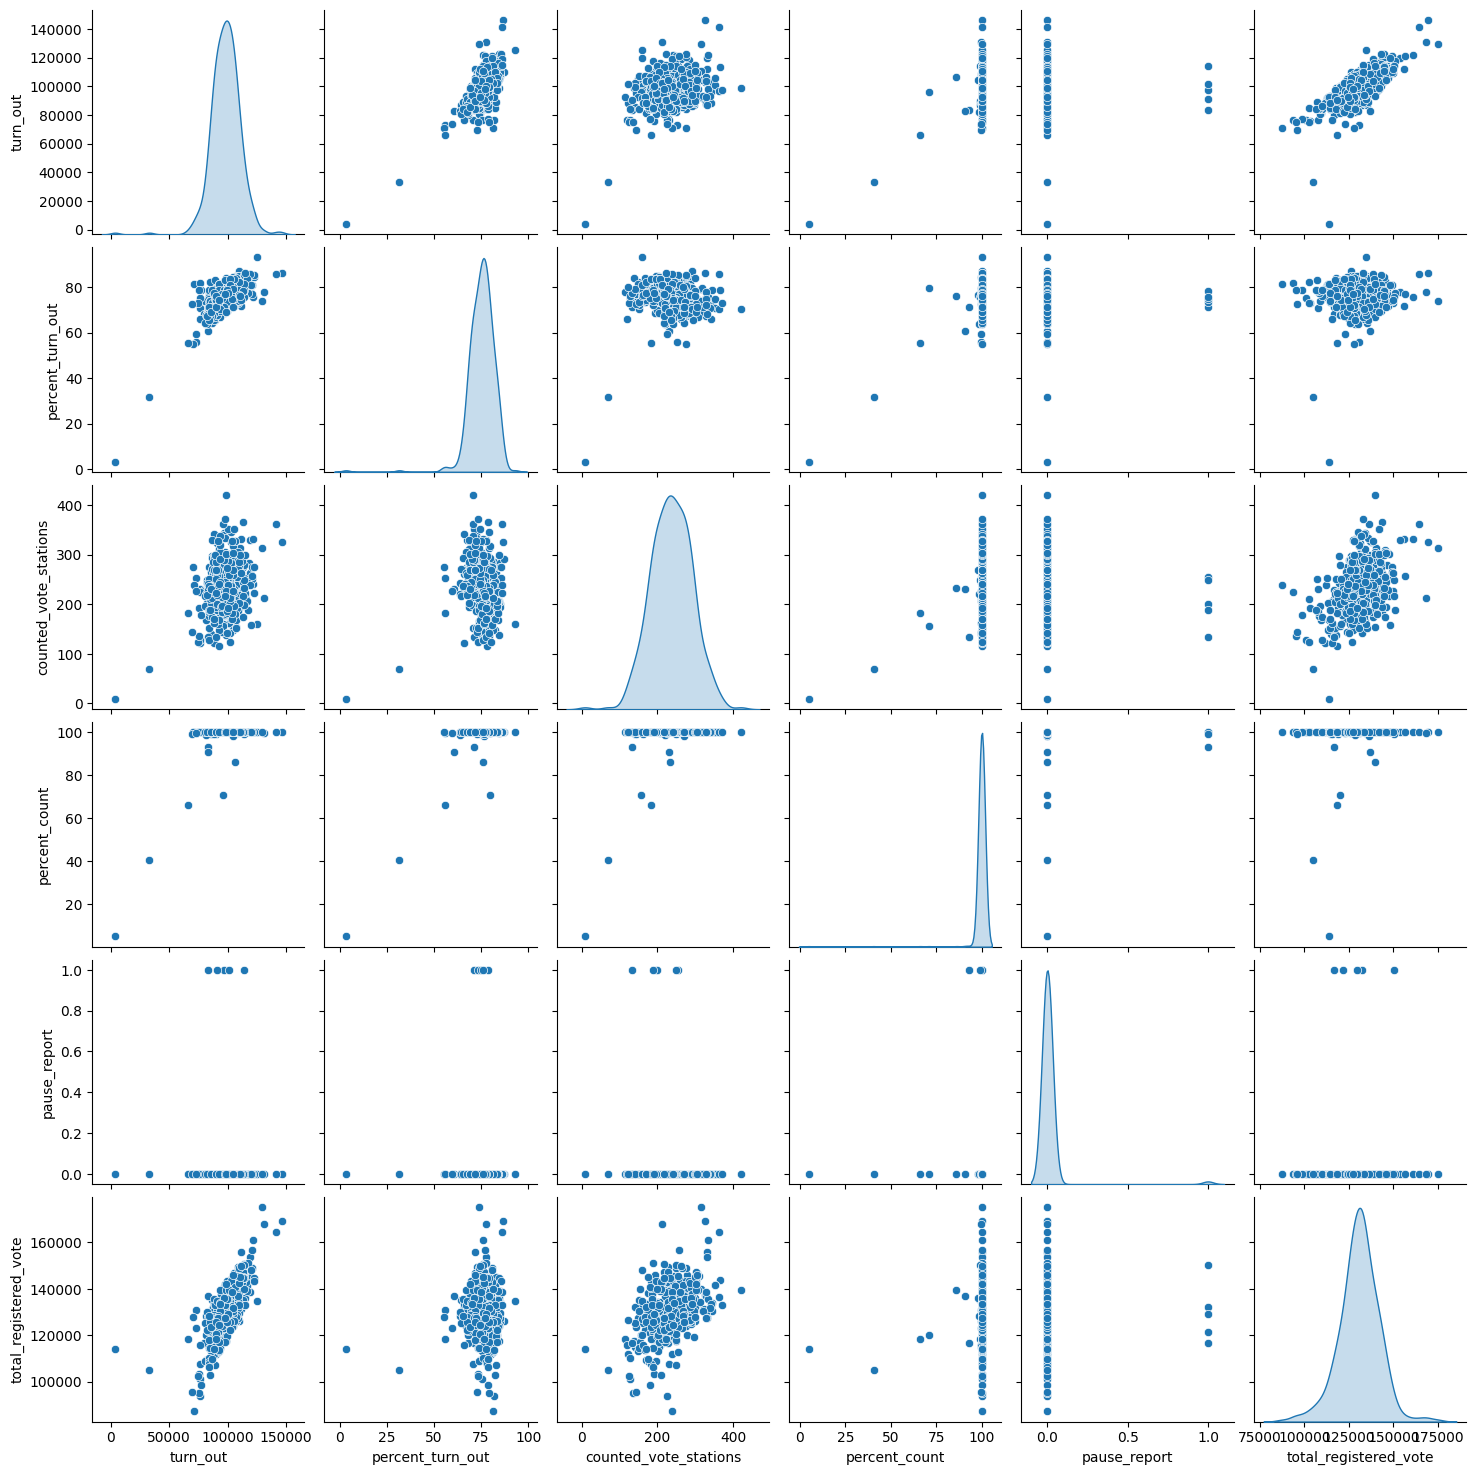

In [ ]:
sb.pairplot(ResultStat,diag_kind="kde")

In [ ]:
print('Correlations of feature to target(percent turn out)')

print('\npercent turn out and counted vote stations')
print(ResultStat['percent_turn_out'].corr(ResultStat['counted_vote_stations']))
print('\npercent turn out and total registered vote')
print(ResultStat['percent_turn_out'].corr(ResultStat['total_registered_vote']))
print('\npercent turn out and turn out')
print(ResultStat['turn_out'].corr(ResultStat['percent_turn_out']))

print('\n\nCorrelations of feature to features')

print('\ntotal registred vote and counted vote stations')
print(ResultStat['total_registered_vote'].corr(ResultStat['counted_vote_stations']))
print('\nturn out and total registered vote')
print(ResultStat['turn_out'].corr(ResultStat['total_registered_vote']))
print('\nturn out and counted vote stations')
print(ResultStat['turn_out'].corr(ResultStat['counted_vote_stations']))

Correlations of feature to target(percent turn out)

percent turn out and counted vote stations
-0.050146253021530585

percent turn out and total registered vote
0.0616611502787622

percent turn out and turn out
0.7238744778814593


Correlations of feature to features

total registred vote and counted vote stations
0.43261070248568667

turn out and total registered vote
0.7299333777402742

turn out and counted vote stations
0.2432682486050302


จากการใช้ฟังก์ชัน describe() เพื่อดูข้อมูลเชิงสถิติ และการพล็อตกราฟจะสังเกตข้อมูลในแต่ละ feature แยกกันได้ว่า
- prov_id มีทั้งหมด 77 เขต โดยมีมากที่สุด คือ กรุงเทพ BKK
- cons_id มีทั้งหมด 400 เขตที่แตกต่างกัน
- pause_report นั้นเกิดขึ้นเพียงแค่ 5 ครั้ง ซึ่งเมื่อเทียบกับ feature อื่นๆด้วยกราฟและตารางแล้ว
พบว่าไม่ส่งผลต่อ feature ใดๆจึงมีความเหมาะสมที่จะตัดออกไป
- turn_out ข้อมูลค่อนข้างเกาะกลุ่มเนื่องจากแต่ละเขตการเลือกตั้งพยายามแบ่งจำนวนคนในแต่ละจังหวัดให้เท่าๆกัน แต่ก็แตกต่างไปได้ตามแต่ละจังหวัดที่มีจำนวนคนไม่เท่ากัน
- percent_turn_out ค่อนข้างเกาะกลุ่มกัน
- counted_vote_stations มีความแตกต่างการกระจายตัวกันมากกว่า feature อื่นซึ่งก็ต่างได้ตามจำนวนประชากรในแต่ละเขต ซึ่งถือว่าน่าสนใจและนำไปพิจารณาต่อถึงความสัมพันธ์ของข้อมูล


นอกจากนี้เพื่อดูความสัมพันธ์ของข้อมูลในแต่ละ feature แล้วจึงพบว่า
- percent count ที่ต่ำแสดงให้เห็นถึงว่าบางเขตนั้นการนับคะแนนยังไม่ครบถ้วน ซึ่งหากนำมาคำนวณจะทำให้ส่งผลกระทบต่อข้อมูลอื่นๆได้ คือ percent turn out และ turn out เพราะยังนับได้ไม่หมด หากนำไปทำเป็นโมเดลอาจส่งผลกระทบต่อค่าเกิดเป็น outlier ได้ซึ่งพิจาณาจากการ print feature และกราฟ ออกมาและสังเกตุค่าของ percent turn out อย่างเห็นได้ชัดถึงผลกระทบ โดยเฉพาะ percent count ที่ต่ำกว่า 98%
- ข้อมูลส่วนมากค่อนข้างที่จะเป็น normal distribution ซึ่งสามารถนำมาใช้ในการสร้างโมเดลได้
- ในเขตที่มีจำนวนผู้มีสิทธิ์มาก(total_registered_vote) ก็จะส่งผลให้ turn out มากขึ้นด้วยตามจำนวนคนในเขต แต่ก็ไม่เสมอไปเนื่องจากคนในเขตอาจมากแต่มาใช้สิทธิ์น้อย (percent_turn_out ต่ำ)
- แนวโน้มที่จำนวนสถานีเลือกตั้งมากขึ้น(counted_vote_stations) ก็ทำให้จำนวนผู้มาใช้สิทธิ์(turn_out)มากขึ้นด้วยเช่นกัน

และยังสามารถพิจารณา correlation ที่แสดงได้ว่า
- Correlation of target
  - จำนวนคนมาใช้เสียงมาก ร้อยละคนมาใช้เสียงก็มากเช่นกัน แต่ต้องอ้างอิงถึงจำนวนคนที่มีสิทธิ์เลือกตั้งทั้งหมดในเขตด้วย
  - ถึงแม้เขตจะมีคนที่มีสิทธิ์เลือกตั้งเยอะ แต่ก็ไม่ได้หมายความว่าคนจะมาเลือกตั้งกันเยอะ
- Correlation of features
  - เขตที่มีคนเยอะ คนก็จะมาใช้เสียงเยอะเช่นกัน
  - ถ้าในเขตมีคนเยอะก็จะมีจำนวนสถานีโหวตเยอะตาม

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for
# multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(40,6))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])


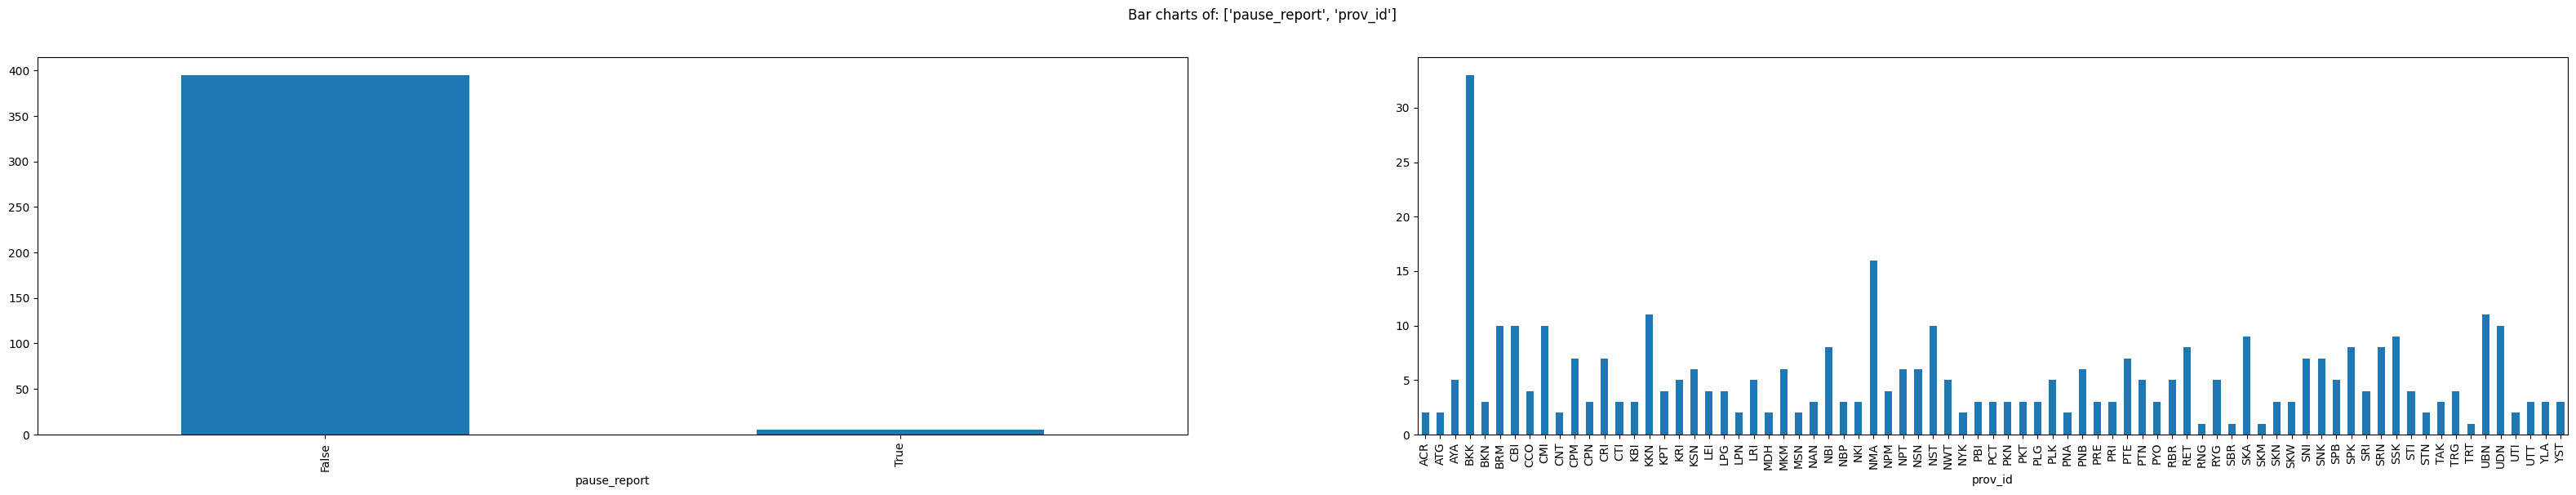

In [ ]:
#run all again if want to run this cell
PlotBarCharts(inpData=ResultStat, colsToPlot=['pause_report','prov_id'])

**จากการทำความเข้าใจข้อมูลทั้งหมดจึงได้เลือก Target เป็น percent_turn_out**
อันเนื่องมาจากว่าทุกๆเขตจะต้องมีร้อยละเปอร์เซ็นต์เป็นค่าผลลัพธ์ที่เป็นหน่วยเดียวกัน ซึ่งมีค่าสูงสุดที่ 100 เปอร์เซ็นต์
จึงได้เลือก Feature ที่จะใช้ดังนี้
- total_registered_vote
_ counted_vote_stations

เนื่องจากค่า total_registered_vote เป็นหน่วยเดียวกันกับ target คือ คนและมีความสัมพันธ์กับ counted_vote_station ด้วย
- percent_turn_out(target)

Feature ที่ถูกตัดออกเนื่องมาจาก
- prov_id และ cons_id นั้นไม่ส่งผลกับ feature อื่นๆจึงตัดทิ้ง และหากจะนำ prov_id มาทำงานก็ไม่ได้เนื่องจากแต่ละจังหวัดมีเขตุเลือกตั้งไม่เท่ากันทำให้เกิดความ skew ของข้อมูลซึ่งจะทำให้การนำข้อมูลไป train ผิดพลาดได้
- pause_report นั้นมีค่าด้านที่เป็น 0 น้อยเกินไปและไม่ส่งผลของแนวโน้ม feature อื่นที่เห็นได้จากการพิจารณา scatterplot และเกิดการ skew อย่างมากไปทางด้านเดียวจึงตัดทิ้ง

<Axes: ylabel='counted_vote_stations'>

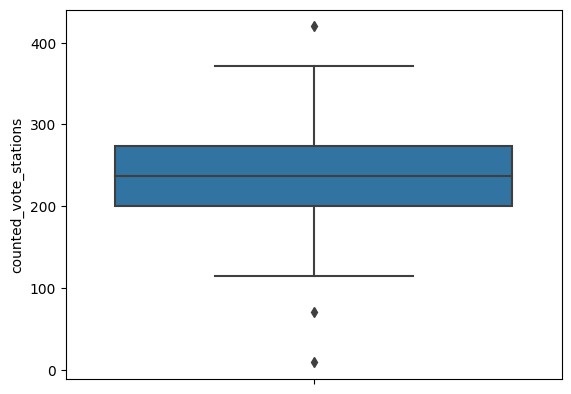

In [ ]:
sb.boxplot(y=ResultStat['counted_vote_stations'])#,x=ResultStat['percent_turn_out'])


จากการดูการกระจายตัวของข้อมูลจำนวนสถานีเลือกตั้ง(counted_vote_stations) พบว่ามีข้อมูลที่ดูเหมือน Outlier อยู่บริเวณ 420 สถานี แต่หากพิจารณาและเทียบข้อมูลแล้วพบว่าจำนวนผู้มีสิทธิ์เลือกตั้งในเขตนั้นเยอะจึงสมเหตุสมผลและไม่นับเป็น outlier

<Axes: ylabel='turn_out'>

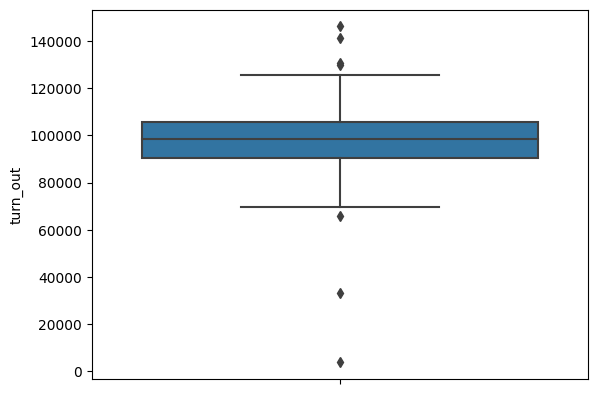

In [ ]:
sb.boxplot(y=ResultStat['turn_out'])

การกระจายตัวของข้อมูล Turnout นั้นมีจุดที่ต่ำกว่าค่าปกติมาก ซึ่งจากการตรวจสอบพบว่าค่าที่ต่ำนั้นมาจากการที่เกิดการนับ (percent_count) นั้นต่ำ ซึ่งหมายถึงเขตนั้นยังนับคะแนนไม่ครบทำให้เกิดการผิดพลาดของข้อมูล turn out ได้ซึ่งนับเป็น outlier ที่สมควรตัดค่าที่ต่ำกว่าปกติออก

นอกจากนี้ค่าการกระจายตัวของข้อมูลก็แตกต่างได้เนื่องจากจำนวนผู้มีสิทธิ์โหวตทั้งหมด(total_registred_vote) ที่มาก อาจมี turn_out ที่น้อยได้เนื่องจากจำนวนผู้มาใช้สิทธิ์

<Axes: ylabel='percent_turn_out'>

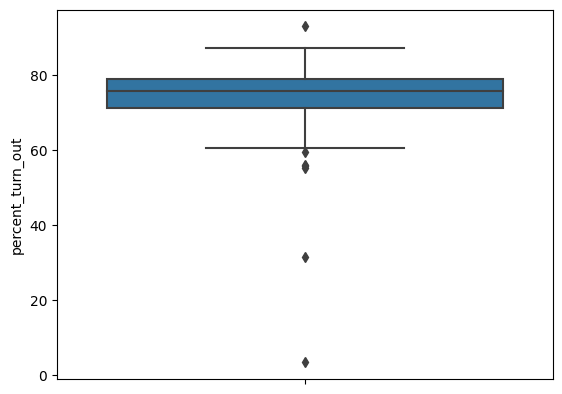

In [ ]:
sb.boxplot(y=ResultStat['percent_turn_out'])

การกระจายตัวของข้อมูล percent_turn_out นั้นมีจุดที่ต่ำกว่าค่าปกติมาก ซึ่งจากการตรวจสอบพบว่าค่าที่ต่ำนั้นมาจากการที่เกิดการนับ (percent_count) นั้นต่ำ ซึ่งหมายถึงเขตนั้นยังนับคะแนนไม่ครบทำให้เกิดการผิดพลาดของข้อมูลคล้ายกับของ turn_out จึงควตัด outlier เหล่านี้ออกให้ข้อมูลไม่ผิดพลาด

<Axes: ylabel='total_registered_vote'>

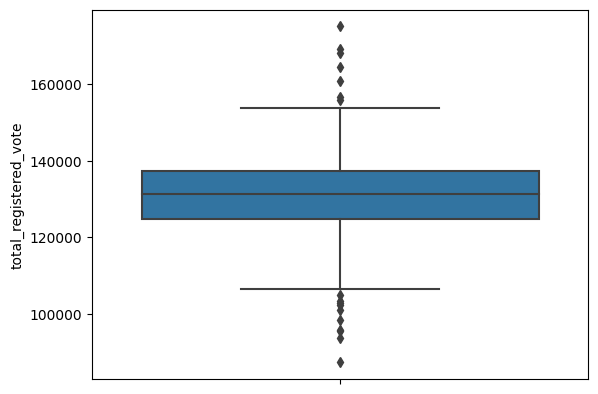

In [ ]:
sb.boxplot(y=ResultStat['total_registered_vote'])


total_registred_vote นั้นขึ้นอยู่กับว่าพื้นที่นั้นมีผู้มีสิทธิ์โหวตมากแค่ไหน ซึ่งแต่ละเขตก็จะมีจำนวนไม่เท่ากันอยู่แล้ว และไม่มี outlier ที่ห่างจากกลุ่มมากเกินไป จึงไม่นับเป็น outlier


จึงทำการกรองข้อมูลที่เกิดการนับ(percent_count) ต่ำกว่า 98% ออกเนื่องอาจส่งผลกระทบต่อความสัมพันธ์ของเปอร์เซ็นต์ข้อมูลได้ เพื่อกำจัด outlier ที่เกิดขึ้นดังที่อธิบายไว้ด้านบน

In [ ]:
#Clean and filter selected features
ResultStat = ResultStat[ResultStat['percent_count'] > 98]
ResultStat = ResultStat.drop(columns=['prov_id','cons_id','pause_report','percent_count'])
ResultStat2 = ResultStat2.drop(columns=['prov_id','cons_id','pause_report','percent_count'])



# Model building and analysis

จากการต้องการสร้างโมเดล categorical แบบ decision tree เพื่อที่จะสามารถจำแนกประเภทได้ว่าพอหรือไม่ จึงทำการทดสอบดูค่าที่น่าจะเหมาะสมในการแบ่งว่ามีร้อยละที่มาใช้งานเพียงพอหรือไม่ โดยจะทำการแบ่งการทดลองออกเป็นสองแบบคือ

1.เลือกให้เป้าหมายตัวแบ่งเปอร์เซนต์ที่ต้องการเป็น 75%

2.เลือกให้เป้าหมายตัวแบ่งเปอร์เซนต์ที่ต้องการเป็น 80%

In [ ]:
# Replace all values in the percent_turn_out column that are greater than 70 with 1 and all values that are less than 70 with 0
ResultStat['percent_turn_out'] = ResultStat['percent_turn_out'].apply(lambda x: 1 if x > 75 else 0 if x <= 75 else x)
ResultStat2['percent_turn_out'] = ResultStat2['percent_turn_out'].apply(lambda x: 1 if x > 80 else 0 if x <= 80 else x)

**ทำการพล็อตกราฟการทดลองที่ 1 : แบ่ง target ที่ 75%**




     turn_out  percent_turn_out  counted_vote_stations  total_registered_vote
0      105574                 0                    310               145416.0
1      111813                 0                    331               155938.0
2       89756                 1                    239               111917.0
3       91466                 1                    253               112739.0
4      110317                 1                    226               138666.0
..        ...               ...                    ...                    ...
395    100319                 1                    192               129255.0
396     97956                 1                    217               127447.0
397    110491                 1                    300               144909.0
398     98432                 0                    302               141903.0
399    104532                 0                    303               146060.0

[393 rows x 4 columns]


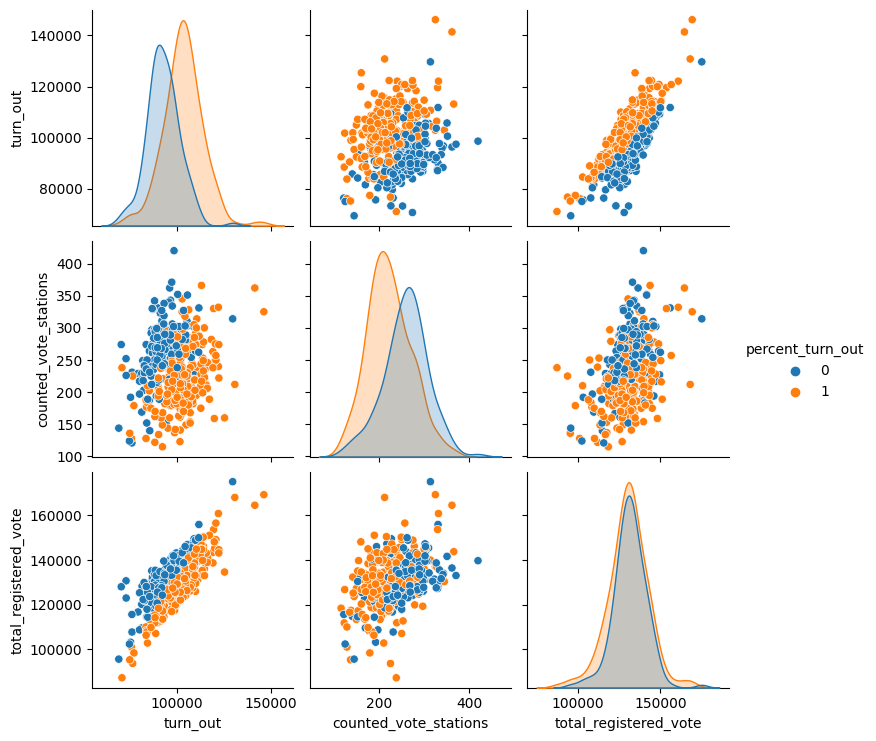

In [ ]:
# Print the DataFrame
print(ResultStat)
sb.pairplot(ResultStat,hue = "percent_turn_out",diag_kind="kde")

<Axes: xlabel='percent_turn_out'>

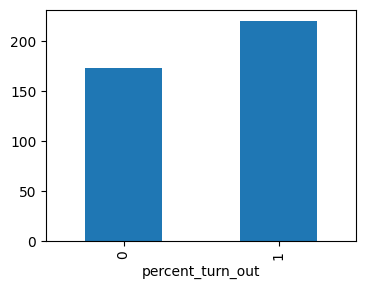

In [ ]:
GroupedData=ResultStat.groupby('percent_turn_out').size()
GroupedData.plot(kind='bar', figsize=(4,3))

จาก scatter graph และ bar graph จะพบว่าเมื่อแบ่งจุดที่ 75% percent_turn_out ค่าที่เปอร์เซ็นต์พอกับไม่พอ 1 และ 0 นั้นจะแบ่งกันเป็นกลุ่มก้อนอย่างชัดเจน และมีปริมาณใกล้เคียงกันซึ่งข้อมูล skew น้อยและเหมาะสมจะนำไปทำโมเดล train ได้ต่อไป เพราะ target มีมากพอให้กับทั้ง 0 และ 1 ใกล้ๆเคียงกัน

---



**ทำการพล็อตกราฟการทดลองที่ 2 : แบ่ง target ที่ 80%**


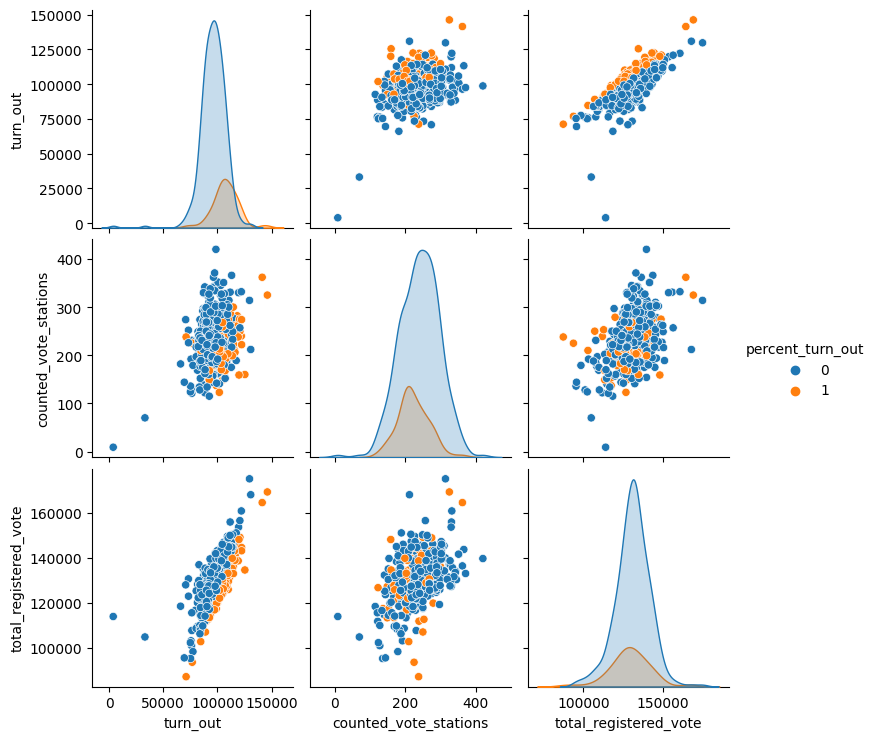

In [ ]:
sb.pairplot(ResultStat2,hue = "percent_turn_out",diag_kind="kde")

<Axes: xlabel='percent_turn_out'>

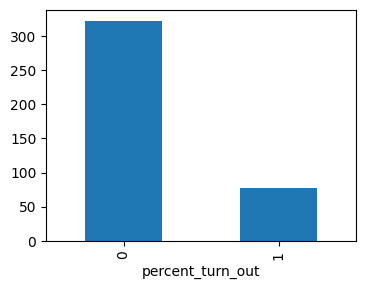

In [ ]:
GroupedData=ResultStat2.groupby('percent_turn_out').size()
GroupedData.plot(kind='bar', figsize=(4,3))

จาก scatter graph และ bar graph จะพบว่าเมื่อแบ่งจุดที่ 80% percent_turn_out ค่าที่เปอร์เซ็นต์พอกับไม่พอ 1 และ 0 นั้นแบ่งได้ไม่ชัดเจน และข้อมูลในส่วนที่เป็น 1 (คือมากกว่า 80% คือผู้มาใช้สิทธิเลือกตั้งมากกว่าที่ต้องการ) มีน้อยกว่า 0 อย่างมากทำให้การเทรนข้อมูลอาจทำให้ไม่สามารถทำนาย percent_turn_out = 1 แม่นยำน้อยลงเนื่องจากข้อมูลเทรนน้อยลง และเกิดการ skew ซึ่งหากเป็นไปตามการทดลองน่าจะทำให้ได้โมเดล 2 ชนิดที่ทำนายได้ไม่เหมือนกัน

# รูปแบบขั้นตอนการทดลอง
1.แบ่งข้อมูลออกเป็น Test 15% และ Train 85%

2.สร้างโมเดล decision tree และพล็อตกราฟเพื่อดูลักษณะของโมเดลที่สร้างขึ้นว่ามีการ classify อย่างไรและมี leaf node เยอะแค่ไหน

3.ทดลอง apply โมเดลกับ trainning dataset และพล็อตกราฟดู classification report และ heatmap

4.ทดลอง apply โมเดลกับ testing dataset และพล็อตกราฟดู classification report และ heatmap


# การทดลองที่ 1 : แบ่ง target ที่ 75%
ทำการสร้างโมเดลด้วยการแบ่ง test และ train ออกเป็น 15% และ 85% โดยให้ค่า percent_turn_out เป็น 1 และ 0 ด้วย label encoder และสร้างโมเดลแบบ categorical ด้วย decision tree


In [ ]:
from numpy.core.multiarray import result_type
#lets try to explore impact of each feature with dicision tree
#Data preparation
from sklearn.model_selection import train_test_split
ResultStat.head()
ResultStatData = ResultStat.drop(columns = ['percent_turn_out','turn_out'])
ResultStatTarget = ResultStat['percent_turn_out']
X_train, X_test, y_train, y_test = train_test_split(ResultStatData,ResultStatTarget,test_size = 0.25,random_state = 420)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion='entropy',)
model_DecisionTree

DecisionTreeClassifier(criterion='entropy')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Convert the string data to numeric data
label_encoder = LabelEncoder()
ResultStat['percent_turn_out'] = label_encoder.fit_transform(ResultStat['percent_turn_out'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(ResultStat.drop(columns=['percent_turn_out','turn_out']), ResultStat['percent_turn_out'],test_size = 0.15,random_state = 0)

# Create a DecisionTreeClassifier model
model_DecisionTree = DecisionTreeClassifier()

# Fit the model to the training data
model_DecisionTree.fit(X_train, y_train)

# Calculate the accuracy of the training and test sets
accuracy_train = model_DecisionTree.score(X_train, y_train)
accuracy_test = model_DecisionTree.score(X_test, y_test)

# Print the accuracy scores
print('Accuracy of training set:{:.2f}'.format(accuracy_train))
print('Accuracy of testing set:{:.2f}'.format(accuracy_test))

Accuracy of training set:1.00
Accuracy of testing set:0.58


|--- counted_vote_stations <= 228.50
|   |--- total_registered_vote <= 132369.00
|   |   |--- total_registered_vote <= 132295.50
|   |   |   |--- counted_vote_stations <= 213.50
|   |   |   |   |--- counted_vote_stations <= 200.50
|   |   |   |   |   |--- total_registered_vote <= 129232.00
|   |   |   |   |   |   |--- total_registered_vote <= 115667.50
|   |   |   |   |   |   |   |--- total_registered_vote <= 114563.00
|   |   |   |   |   |   |   |   |--- counted_vote_stations <= 190.50
|   |   |   |   |   |   |   |   |   |--- total_registered_vote <= 104363.50
|   |   |   |   |   |   |   |   |   |   |--- total_registered_vote <= 101716.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- total_registered_vote >  101716.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- total_registered_vote >  104363.50
|   |   |   |   |   |   |   |   |   |   |--- counted_vote_sta

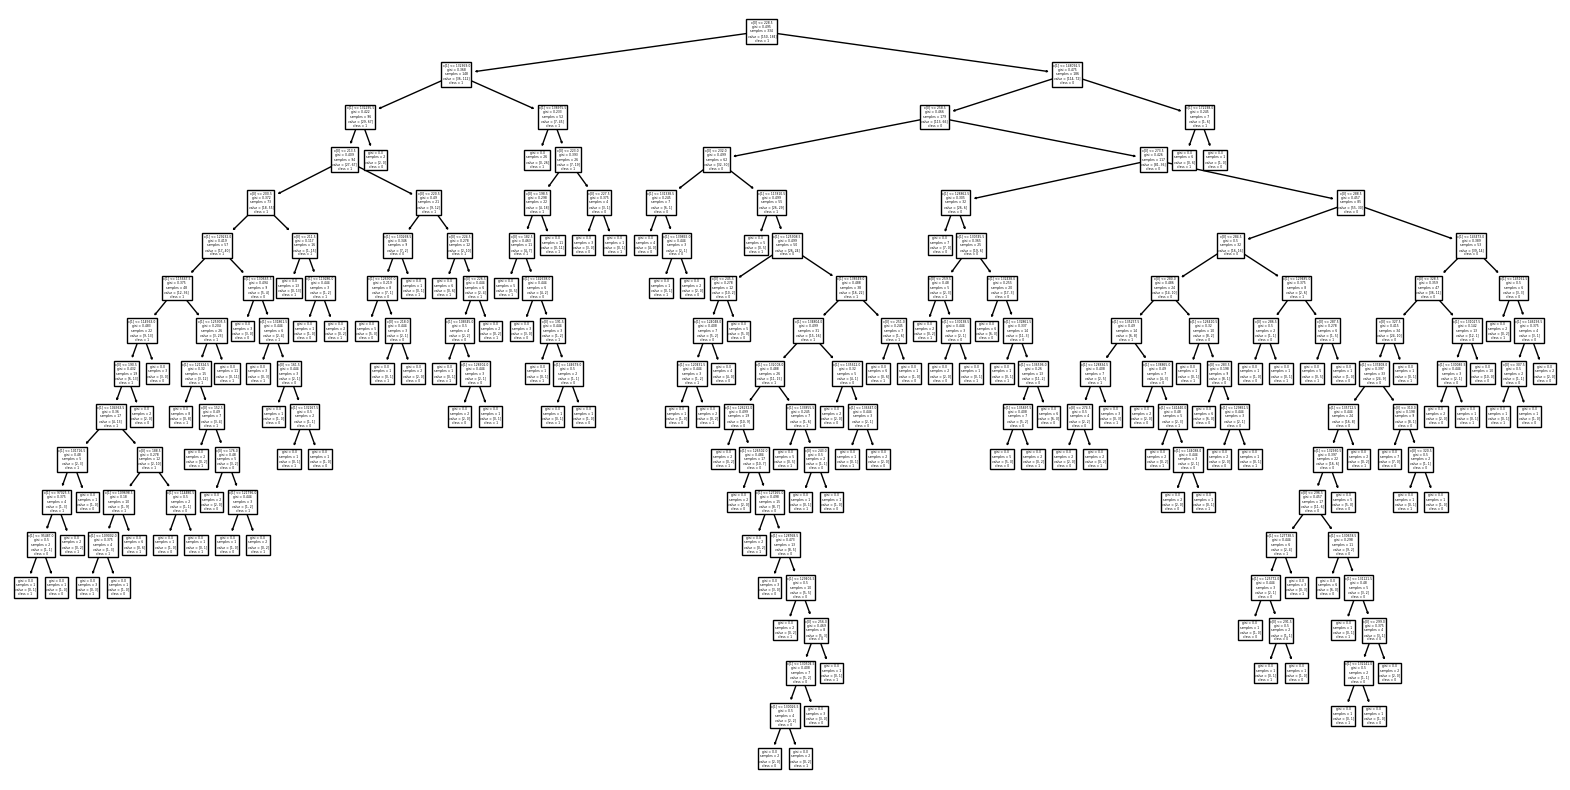

In [ ]:
#Visualization
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

print(export_text(model_DecisionTree,feature_names = list(ResultStat.drop(columns=['percent_turn_out','turn_out']).columns)))
plt.figure(figsize=(20,10))
names = ['0', '1']
plot_tree(model_DecisionTree,class_names=names)
plt.show()

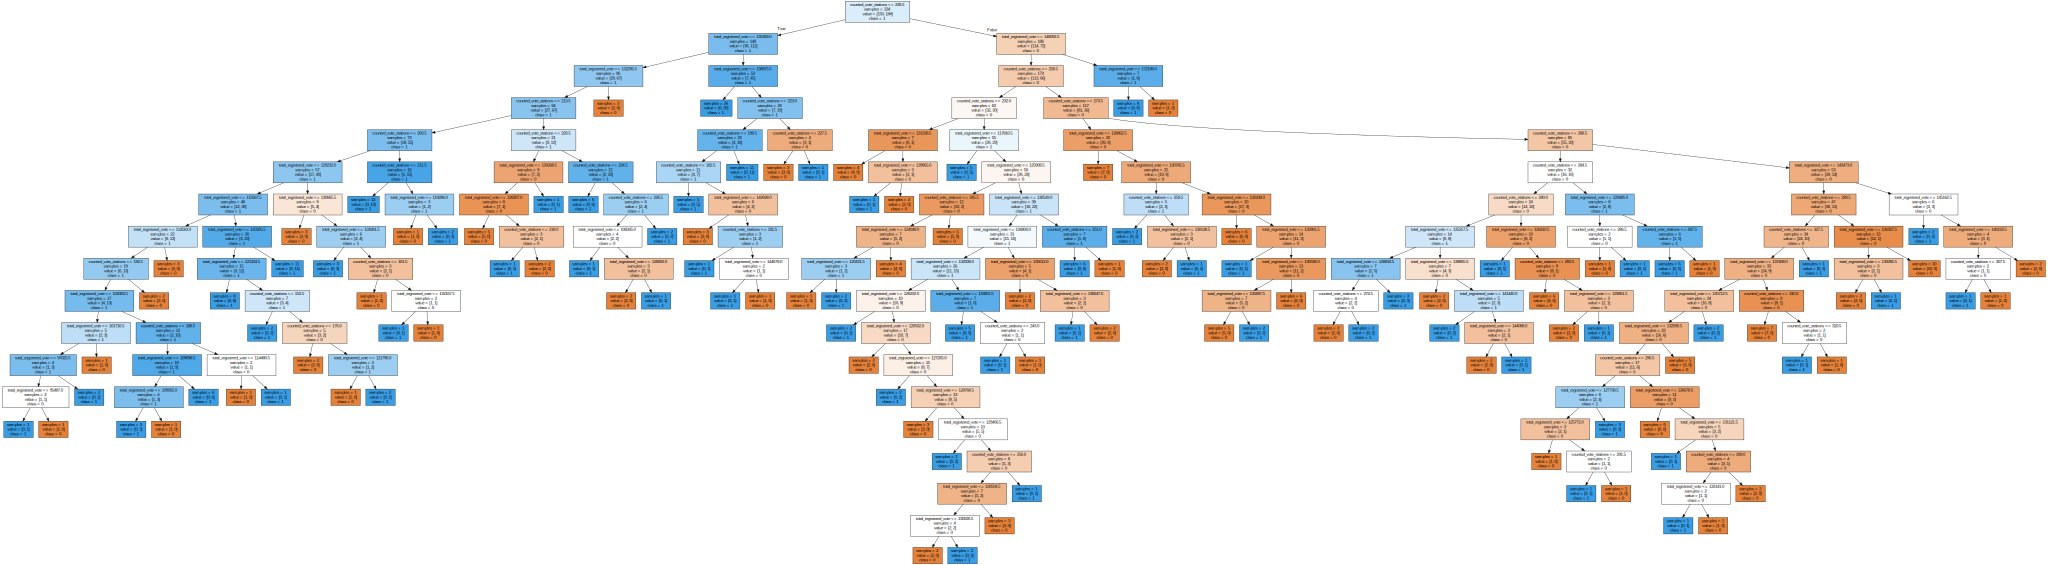

In [ ]:
import graphviz

def plot_decision_tree(model_DecisionTree, feature_names, class_names):
    export_graphviz(model_DecisionTree, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled=True, impurity=False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

# Plot the decision tree
plot_decision_tree(model_DecisionTree, ResultStat.drop(columns=['percent_turn_out','turn_out']).columns, names)

In [ ]:
#Predict on training set
y_pred = model_DecisionTree.predict(X_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))


Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       184

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



<Figure size 640x480 with 0 Axes>

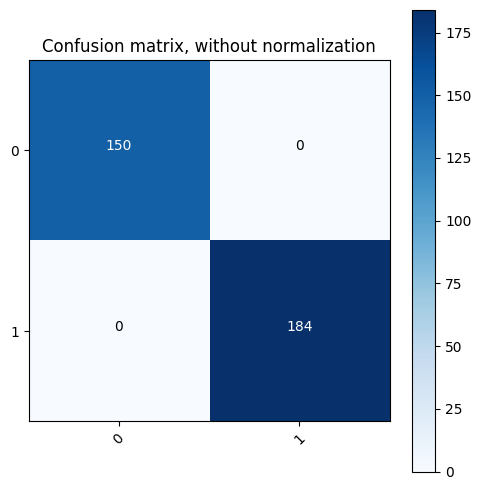

In [ ]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()


class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
#Predict on training set
y_pred = model_DecisionTree.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.45      0.39      0.42        23
           1       0.64      0.69      0.67        36

    accuracy                           0.58        59
   macro avg       0.55      0.54      0.54        59
weighted avg       0.57      0.58      0.57        59



<Figure size 640x480 with 0 Axes>

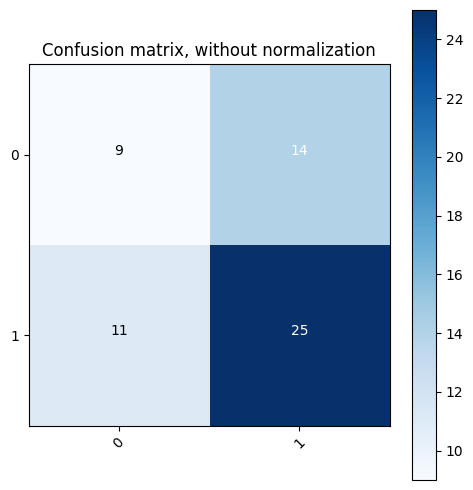

In [ ]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Calculate the feature importances
feature_importances = model_DecisionTree.feature_importances_

# Print the feature importances
print(feature_importances)

[0.44811762 0.55188238]


จะเห็นได้ว่าเมื่อทดลองอ่านพบว่าโมเดลสามารถแยกประเภทของ train ได้ดีมาก แต่ก็ยังแยก test ได้ไม่ดีเท่าที่ควรคือเกิด overfitting ที่สามารถทำนาย percent_turn_out = 1 ได้แม่นยำมากกว่า

# การทดลองที่ 2 : แบ่ง target ที่ 80%


In [ ]:
ResultStat2.head()
ResultStat2Data = ResultStat2.drop(columns = ['percent_turn_out','turn_out'])
ResultStat2Target = ResultStat2['percent_turn_out']
X_train2, X_test2, y_train2, y_test2 = train_test_split(ResultStat2Data,ResultStat2Target,test_size = 0.25,random_state = 420)

In [ ]:
# Convert the string data to numeric data
label_encoder = LabelEncoder()
ResultStat2['percent_turn_out'] = label_encoder.fit_transform(ResultStat2['percent_turn_out'])

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(ResultStat2.drop(columns=['percent_turn_out','turn_out']), ResultStat2['percent_turn_out'],test_size = 0.15,random_state = 0)

# Create a DecisionTreeClassifier model
model_DecisionTree = DecisionTreeClassifier()

# Fit the model to the training data
model_DecisionTree.fit(X_train2, y_train2)

# Calculate the accuracy of the training and test sets
accuracy_train2 = model_DecisionTree.score(X_train2, y_train2)
accuracy_test2 = model_DecisionTree.score(X_test2, y_test2)

# Print the accuracy scores
print('Accuracy of training set:{:.2f}'.format(accuracy_train2))
print('Accuracy of testing set:{:.2f}'.format(accuracy_test2))

Accuracy of training set:1.00
Accuracy of testing set:0.68


|--- counted_vote_stations <= 225.50
|   |--- counted_vote_stations <= 198.50
|   |   |--- total_registered_vote <= 129047.00
|   |   |   |--- total_registered_vote <= 125706.00
|   |   |   |   |--- total_registered_vote <= 112638.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_registered_vote >  112638.50
|   |   |   |   |   |--- total_registered_vote <= 113770.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- total_registered_vote >  113770.00
|   |   |   |   |   |   |--- total_registered_vote <= 120776.50
|   |   |   |   |   |   |   |--- counted_vote_stations <= 138.50
|   |   |   |   |   |   |   |   |--- counted_vote_stations <= 135.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- counted_vote_stations >  135.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- counted_vote_stations >  138.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- total_regis

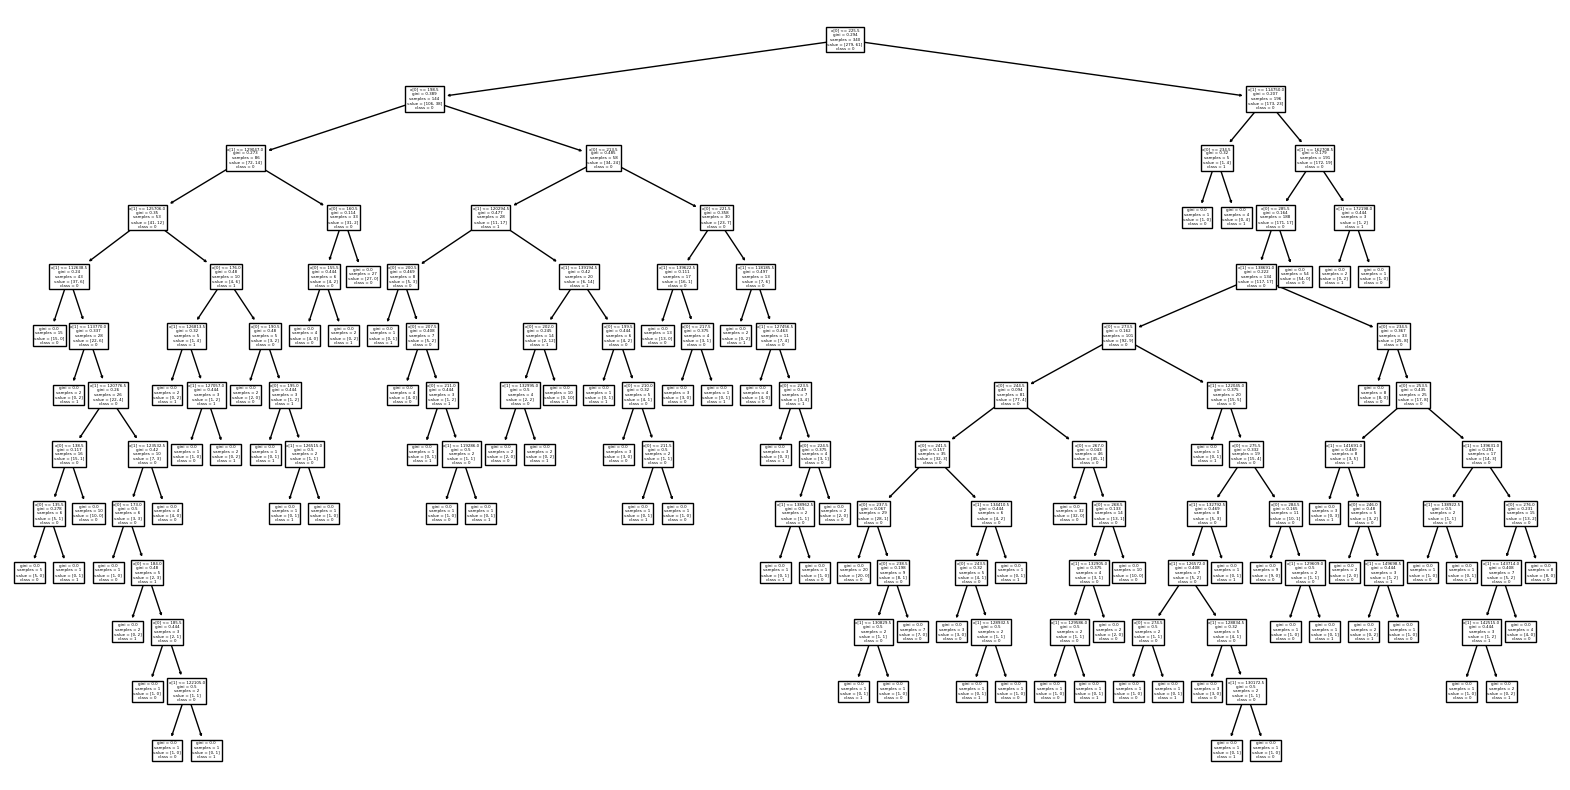

In [ ]:
#Visualization
print(export_text(model_DecisionTree,feature_names = list(ResultStat2.drop(columns=['percent_turn_out','turn_out']).columns)))
plt.figure(figsize=(20,10))
names = ['0', '1']
plot_tree(model_DecisionTree,class_names=names)
plt.show()

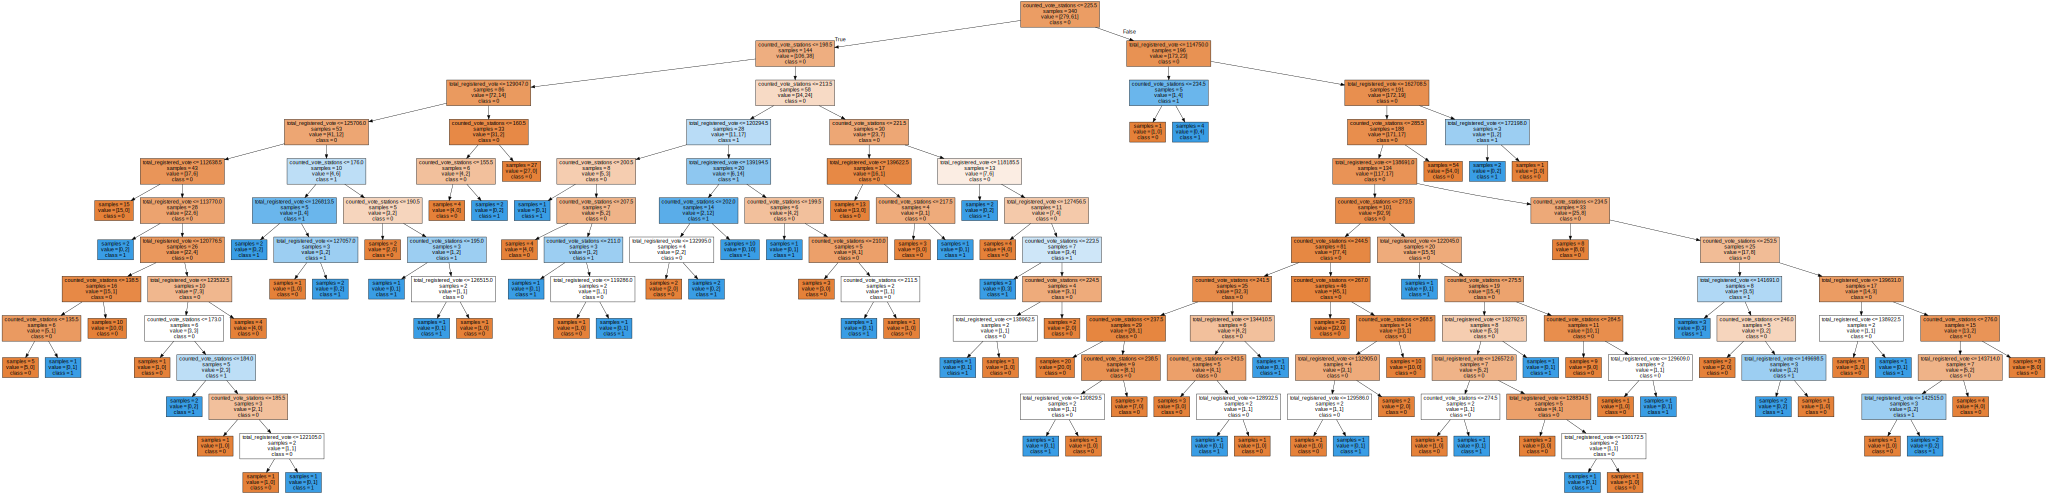

In [ ]:

# Plot the decision tree
plot_decision_tree(model_DecisionTree, ResultStat2.drop(columns=['percent_turn_out','turn_out']).columns, names)

In [ ]:
#Predict on training set
y_pred2 = model_DecisionTree.predict(X_train2)

# Classification report
print("Classification report \n=======================")
print(classification_report(y_true=y_train2, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00        61

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



<Figure size 640x480 with 0 Axes>

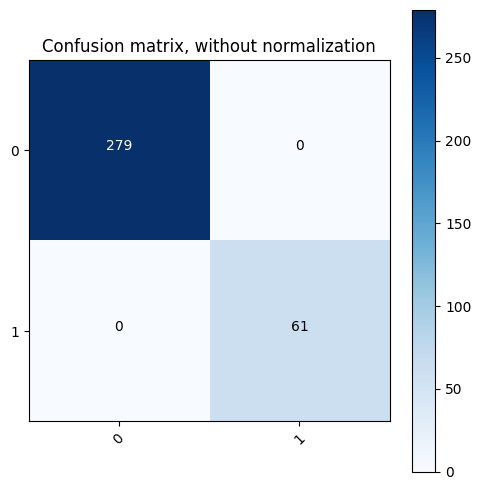

In [ ]:
class_names = list(set(y_train2))
cnf_matrix = confusion_matrix(y_true=y_train2, y_pred=y_pred2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
#Predict on testing set
y_pred2 = model_DecisionTree.predict(X_test2)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test2, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        43
           1       0.38      0.18      0.24        17

    accuracy                           0.68        60
   macro avg       0.55      0.53      0.52        60
weighted avg       0.63      0.68      0.64        60



<Figure size 640x480 with 0 Axes>

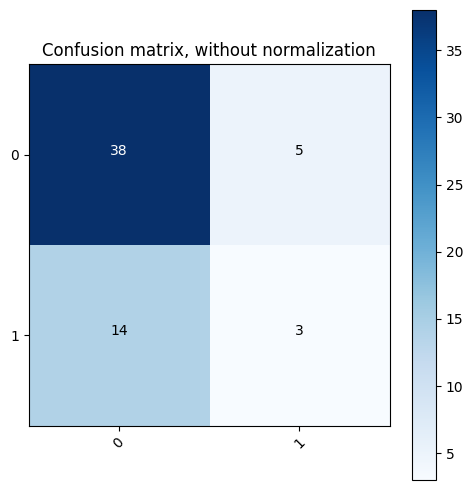

In [ ]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
# Calculate the feature importances
feature_importances = model_DecisionTree.feature_importances_

# Print the feature importances
print(feature_importances)

[0.49757956 0.50242044]


จากการทดลองที่ 2 จะเห็นได้ว่าข้อมูลที่นำมา train จะมีในส่วนของ percent_turn_out = 0 มากกว่า ซึ่งเมื่อพิจารณาจาก recall และ support แล้วก็เหมาะสมที่ percent_turn_out = 0 นั้นแม่นยำกว่า แต่โมเดลก็ยังเกิด overfitting อยู่ดีเมื่ออ่านผลจากการ predict test และ predict train ซึ่งอาจจะมาจาก leaf node ที่มากเกินไป จึงนำไปสู่การทดลองที่ 3 คือการจำกัด leaf node

#การทดลองที่ 3 : ลดการเกิด Overfitting ด้วยการจำกัด leaf node ของ decision tree
โดยการจำกัดไว้ที่ 6 node เพื่อไม่ให้ค่าที่เกิดการตัดสินใจนั้นแปรปรวนตามชุดข้อมูลมากเกินไป

In [ ]:
# Create a DecisionTreeClassifier model
model_DecisionTree = DecisionTreeClassifier(max_leaf_nodes=5)

# Fit the model to the training data
model_DecisionTree.fit(X_train2, y_train2)

DecisionTreeClassifier(max_leaf_nodes=5)

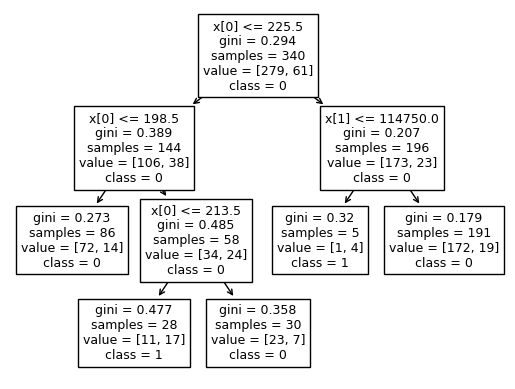

In [ ]:
plot_tree(model_DecisionTree,class_names=names)
plt.show()

In [ ]:
#Predict on training set
y_pred2 = model_DecisionTree.predict(X_train2)

# Classification report
print("Classification report \n=======================")
print(classification_report(y_true=y_train2, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       279
           1       0.64      0.34      0.45        61

    accuracy                           0.85       340
   macro avg       0.75      0.65      0.68       340
weighted avg       0.83      0.85      0.83       340



<Figure size 640x480 with 0 Axes>

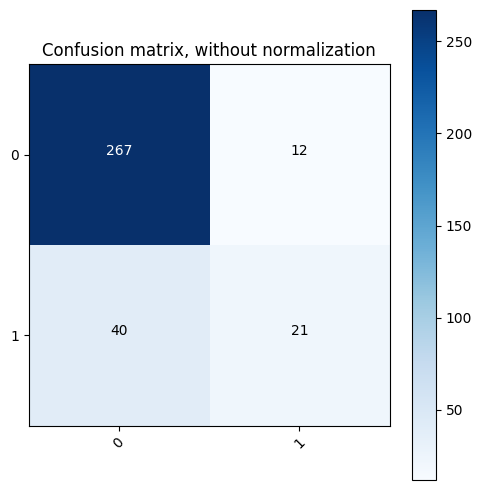

In [ ]:
class_names = list(set(y_train2))
cnf_matrix = confusion_matrix(y_true=y_train2, y_pred=y_pred2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
#Predict on testing set
y_pred2 = model_DecisionTree.predict(X_test2)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test2, y_pred=y_pred2))

Classification report 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        43
           1       0.44      0.24      0.31        17

    accuracy                           0.70        60
   macro avg       0.59      0.56      0.56        60
weighted avg       0.66      0.70      0.67        60



<Figure size 640x480 with 0 Axes>

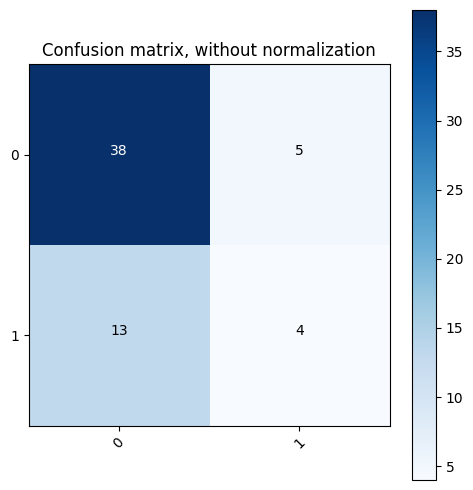

In [ ]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

หลังจากทดลองแล้วพบว่าถึงแม้จะลดการ overfit ด้วยการจำกัดจำนวน leaf node นั้นทำให้การ predict train data นั้นแม่นยำลดลงได้จริง แต่ก็เพิ่ม test data แค่ 1-2% เท่านั้น ซึ่งแสดงว่าค่า hyperparameter ยังไม่เหมาะสม หรือควรเลือกใช้วิธีอื่นในการลด overfitting

#สรุปผลการทดลอง

1.การเลือกจุดที่ทำให้เกิดการแบ่งของ decision tree มีผลต่อการแบ่งข้อมูล target ในที่นี้คือ percent_turn_out ซึ่งจำนวนก็จะต่างกันทำให้ class target ก็จะมีปริมาณข้อมูลในการ train โมเดลที่ต่างกัน ทำให้ความแม่นยำ หรือ recall และ f1-score นั้นมีค่าต่างกันไป

2.ถึงแม้จะแบ่งให้ class target นั้นมีปริมาณใกล้เคียงกันก็อาจจไม่ช่วยให้มีความแม่นยำในการทำนายสูงขึ้นได้ ในกรณีที่ทดลองกับ target ที่มีแค่ 2 class ซึ่งดูได้จากผลลัพธ์การทดลองที่ 1 และ 2 ที่มี weighted average precision 55 และ 65 เปอร์เซ็นต์ตามลำดับ

3.การทดลองลด overfit ของ decision tree จะต้องหาค่า hyperparameter ที่เหมาะสมหรือวิธีการที่เหมาะสมซึ่งมีได้หลายวิธี เช่น การลดจำนวน leaf node หรือการทำ cross validation